In [1]:
# a, b = [0, 5]
# f = e^sin(2x))

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import sympy as sp
import random

In [3]:
def f(x):
    return pow(math.e, math.sin(2*x))

a = 0
b = 5
n = 20
h = (b-a)/(n-1)

x = []
for i in range(n):
    x.append(a + h*i)

y = []    
for i in x:
    y.append(f(i))



In [115]:
x, y

([0.0,
  0.2631578947368421,
  0.5263157894736842,
  0.7894736842105263,
  1.0526315789473684,
  1.3157894736842104,
  1.5789473684210527,
  1.8421052631578947,
  2.1052631578947367,
  2.3684210526315788,
  2.631578947368421,
  2.894736842105263,
  3.1578947368421053,
  3.4210526315789473,
  3.6842105263157894,
  3.9473684210526314,
  4.2105263157894735,
  4.473684210526316,
  4.7368421052631575,
  5.0],
 [1.0,
  1.652602229885366,
  2.38388049029292,
  2.71819152984382,
  2.3644379451560193,
  1.6293631107560815,
  0.9838307869551383,
  0.5966768514451225,
  0.4161589372311995,
  0.3679894398666502,
  0.42650876197038434,
  0.6225710467348535,
  1.0331355386259897,
  1.6993924680736132,
  2.4215636367608546,
  2.716025562448327,
  2.3244371997444744,
  1.5832503280460344,
  0.952288964362536,
  0.5804096620472413])

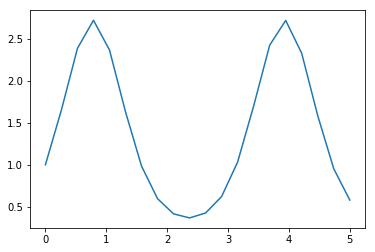

In [6]:
plt.plot(x, y)

In [15]:
y_sh = []
for i in range(len(x)):
    y_sh.append(y[i] + (- 0.5 + random.random())/3)
y_sh

[0.9997844828583489,
 1.7402623555867471,
 2.426226851819732,
 2.815749916320262,
 2.272050796749995,
 1.7712814995145696,
 0.8734392054631352,
 0.5492073274635328,
 0.3396918373041759,
 0.4219093747240809,
 0.5525085656948487,
 0.4749908922636824,
 0.9920160118870918,
 1.6363944741427998,
 2.543415626439243,
 2.5774711204481844,
 2.2203801913946206,
 1.6947933431264492,
 0.8448491719798568,
 0.6988608814855165]

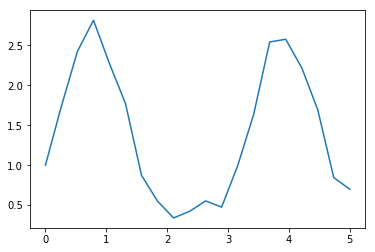

In [16]:
plt.plot(x, y_sh)

In [18]:
#Линейное сглаживание по 3 точкам
def lin3(y_sh):
    y_lin3 = []
    y_lin3.append(y_sh[0])
    for i in range(1, len(y_sh)-1):
        y_lin3.append((y_sh[i-1]+y_sh[i]+y_sh[i+1])/3)
    y_lin3.append(y_sh[-1])
    return y_lin3

def lin5(y_sh):
    y_lin5 = []
    y_lin5.append(y_sh[0])
    y_lin5.append(y_sh[1])
    for i in range(2, len(y_sh)-2):
        y_lin5.append((y_sh[i-2]+y_sh[i-1]+y_sh[i]+y_sh[i+1]+y_sh[i+2])/5)
    y_lin5.append(y_sh[-2])
    y_lin5.append(y_sh[-1])
    return y_lin5

def nonlin7(y_sh):
    y_nonlin7 = []
    y_nonlin7.append(y_sh[0])
    y_nonlin7.append(y_sh[1])
    y_nonlin7.append(y_sh[2])
    for i in range(3, len(y_sh)-3):
        y_nonlin7.append(((7*y_sh[i] + 6*(y_sh[i+1]+y_sh[i-1]) + 3*(y_sh[i+2]+y_sh[i-2]) - 2*(y_sh[i+3]+y_sh[i-3])))/21)
    y_nonlin7.append(y_sh[-3])
    y_nonlin7.append(y_sh[-2])
    y_nonlin7.append(y_sh[-1])
    return y_nonlin7

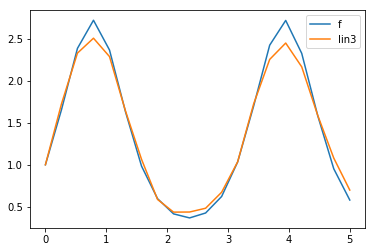

In [20]:
plt.plot(x, y, label='f')
plt.plot(x, lin3(y_sh), label='lin3')
plt.legend()

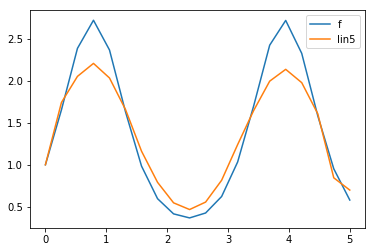

In [21]:
plt.plot(x, y, label='f')
plt.plot(x, lin5(y_sh), label='lin5')
plt.legend()

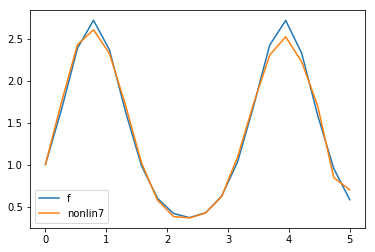

In [22]:
plt.plot(x, y, label='f')
plt.plot(x, nonlin7(y_sh), label='nonlin7')
plt.legend()

In [26]:
def srkverr(y, y_new):
    return (1/len(y))*sum([(abs(y[i]-y_new[i]))**2 for i in range(len(y))])

In [31]:
srkverr(y, lin3(y_sh))

0.011747498928537256

In [33]:
srkverr(y, lin5(y_sh))

0.0678962149694327

In [34]:
srkverr(y, nonlin7(y_sh))

0.0068813821300936885

In [35]:
def Lagr(x, i, xs, ys):
    N = len(xs)-1
    L = 1
    for j in range(0, N):
        if j != i:
            L = L*(x-xs[j])/(xs[i]-xs[j]) 
    L = L*ys[i]
    return L

def Lagrang(x, N, xs, ys):
    s = 0
    for i in range(N):
        s += Lagr(x, i, xs, ys)
    return s

In [36]:
xs_lagr = [x[1], x[6], x[12], x[19]]
ys_lagr = [f(i) for i in xs_lagr]

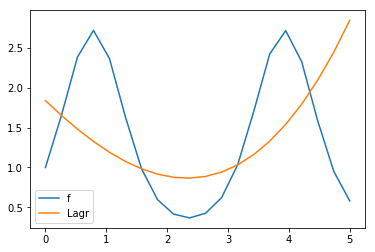

In [116]:
plt.plot(x, y, label='f')
plt.plot(x, [Lagrang(i, 4, xs_lagr, ys_lagr) for i in x], label='Lagr')
plt.legend()

In [39]:
srkverr(y, [Lagrang(i, 4, xs_lagr, ys_lagr) for i in x])

0.8391754564574241

In [42]:
def cubic_interp1d(x0, x, y):
    x = np.asfarray(x)
    y = np.asfarray(y)

    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]

    size = len(x)

    xdiff = np.diff(x)
    ydiff = np.diff(y)

    Li = np.empty(size)
    Li_1 = np.empty(size-1)
    z = np.empty(size)

    Li[0] = math.sqrt(2*xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = math.sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = math.sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size-1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    f0 = zi0/(6*hi1)*(xi1-x0)**3 + \
         zi1/(6*hi1)*(x0-xi0)**3 + \
         (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + \
         (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

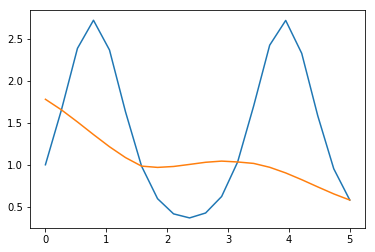

In [43]:
plt.plot(x,y, x, cubic_interp1d(x, xs_lagr, ys_lagr))

In [45]:
srkverr(y, cubic_interp1d(x, xs_lagr, ys_lagr))

0.7581054804208839

In [112]:
import scipy as sp

def mnkGP(x,y,d):
    #d - степень полинома
    fp, residuals, rank, sv, rcond = sp.polyfit(x, y, d, full=True) # Модель
    f = sp.poly1d(fp) # аппроксимирующая функция
    for i in range(len(fp)):
        print('Коэффициент {} - {}'.format(i+1, fp[i]))
        
    y1 = []
    for i in range(len(x)):
        a = 0
        for j in range(len(fp)):
            a+=fp[j]*x[i]**(len(fp)-1-j)
        y1.append(a)
    so = srkverr(y, y1)
    print('СКО - '+str(so)) 
    plt.plot(x, y, 'o', label='Original data', markersize=10)
    plt.plot(x,  f(x))
    plt.grid(True)
    plt.legend()
    plt.show()


Коэффициент 1 - -0.1975466857813514
Коэффициент 2 - 1.915172113802347
Коэффициент 3 - -5.700975779919521
Коэффициент 4 - 5.130423726082673
Коэффициент 5 - 1.0090776811928366
СКО - 0.1117926533517476


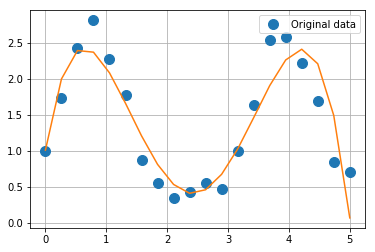

In [114]:
mnkGP(x, y_sh, 4)

Коэффициент 1 - -0.005854642800361616
Коэффициент 2 - 0.13987092819631125
Коэффициент 3 - -1.3982649305656438
Коэффициент 4 - 7.56713375248689
Коэффициент 5 - -23.87788642477535
Коэффициент 6 - 43.69025761977683
Коэффициент 7 - -42.292248681945125
Коэффициент 8 - 16.025186320314262
Коэффициент 9 - -0.7647536282927158
Коэффициент 10 - 2.396883075606828
Коэффициент 11 - 1.0034674531146022
СКО - 0.009151383206769849


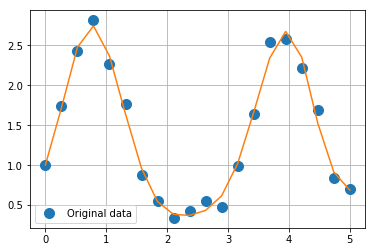

In [118]:
mnkGP(x, y_sh, 10)